Hypothesis testing with Python

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [49]:
data = pd.read_csv('marketing_sales_data.csv')
data.head()



,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


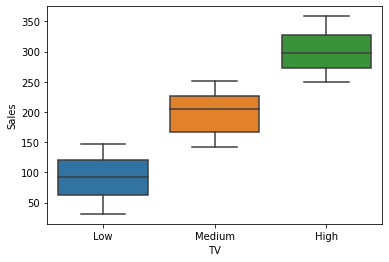

In [50]:

sns.boxplot(x='TV',y='Sales',data=data)

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

yes the variation is significant

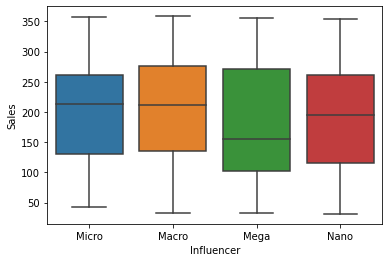

In [51]:
sns.boxplot(x='Influencer',y='Sales',data=data)

**Question:** Is there variation in `Sales` based off the `Influencer` size?

the variation is there but not that significant

In [68]:
# data cleaning and dropping all the empty rows
data.dropna(axis=0)
data.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
567    0
568    0
569    0
570    0
571    0
Length: 572, dtype: int64

In [53]:
ols_formula = 'Sales ~ C(TV)'  # Sales is the dependent variable and TV is the independent variable
OLS = ols(formula=ols_formula, data=data)
model = OLS.fit()  # Fit the model
print(model.summary())  # Print the summary of the model
residuals = model.resid  # Access the residuals


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1981.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          1.52e-256
Time:                        18:22:05   Log-Likelihood:                -2783.4
No. Observations:                 570   AIC:                             5573.
Df Residuals:                     567   BIC:                             5586.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.415    1

**Question:** Which categorical variable did you choose for the model? Why?

TV since there was a strong relationship between Sales and TV

**Question:** Is the linearity assumption met?

NO,
since there are no continous independent variables the linearity assumption failed and  As each marketing promotion (row) is independent from one another, the independence assumption is accepted

Text(0.5, 1.0, 'QQ plot')

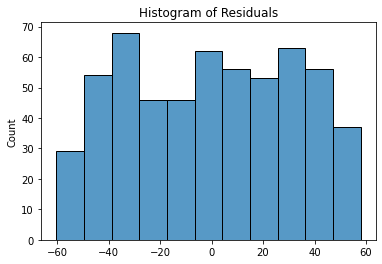

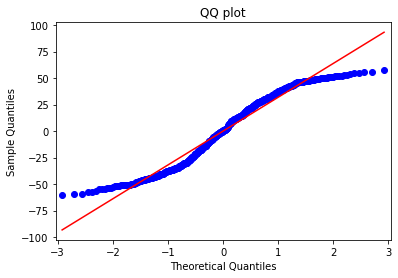

In [54]:
hist=sns.histplot(residuals)
plt.title('Histogram of Residuals')
sm.qqplot(residuals,line='s')
plt.title('QQ plot')





**Question:** Is the normality assumption met?

No, since its forms a s shape rather a straight line

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

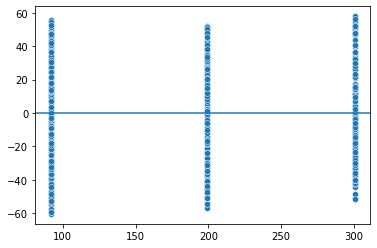

In [55]:
# Create a scatter plot with the fitted values from the model and the residuals.
sns.scatterplot(x=model.fittedvalues,y=model.resid).axhline(0)


**Question:** Is the constant variance (homoscedasticity) assumption met?

yes since fitted values are similarly distributed

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [56]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1981.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          1.52e-256
Time:                        18:22:05   Log-Likelihood:                -2783.4
No. Observations:                 570   AIC:                             5573.
Df Residuals:                     567   BIC:                             5586.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.415    124.450      0.000     295.786     305.273
C(TV)[T.Low]     -208.8827      3.323    -62.862      0.000    -215.409    -202.356
C(TV)[T.Medium]  -101.5061      3.323    -30.548      0.000    -108.033     -94.979
==============================================================================
Omnibus:                      445.741   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.711
Skew:                          -0.042   Prob(JB):                     1.76e-08
Kurtosis:                       1.777   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

since R-squared is 87.5% it makes a strong prediction for TV as an idependent variable

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

first there are only two categories there medium and low and as per table and the low TV promotion would be 208.8827 million lower than high TV category 

### A one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [57]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.065806e+06,2.032903e+06,1980.694879,1.516108e-256
Residual,567.0,5.819452e+05,1.026358e+03,NaN,NaN


**Question:** What are the null and alternative hypotheses for the ANOVA test?

null would be that there is no difference in sales based on TV promotion
alternate would be there is differenvce

**Question:** What is your conclusion from the one-way ANOVA test?

p value is less than 0.05 so we reject null hypothesis 

**Question:** What did the ANOVA test tell you?

that we can reject null hyothesis